##tut trig_functions

In this tutorial, we will learn how to use SciPy's LU solver.

We will solve an interpolation problem where we will fit a cubic function,
$$y = a_3 x^3 + a_2 x^2 + a_1 x + a_0$$
to four points along the sine curve from $0$ to $\pi/2$ that are equally spaced in $x$.

We'll start with our imports:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spla

Next, we'll set up the linear system, which consists in computing the Vandermonde matrix (`mtx`) and defining the right-hand side (`rhs`) simply as the evaluation of the sine function:

In [7]:
x = np.linspace(0., np.pi / 2., 4)

mtx = np.empty((4, 4))
mtx[:, 0] = 1.
mtx[:, 1] = x
mtx[:, 2] = x ** 2
mtx[:, 3] = x ** 3

rhs = np.sin(x)

Now, we are ready to solve the system.

In [8]:
lu, piv = spla.lu_factor(mtx)
sol = spla.lu_solve((lu, piv), rhs)

The vector, `sol`, contains our coefficients. We can evaluate the cubic approximation and the true function with a finer discretization of the 0 to 1 interval (`xf`):

In [9]:
num_points = 100
xf = np.linspace(0., np.pi / 2., num_points)
cubic = sol[0] + sol[1] * xf + sol[2] * xf ** 2 + sol[3] * xf ** 3
true = np.sin(xf)

Now, we will plot the true function, its 4 evaluated points, and the cubic approximation:

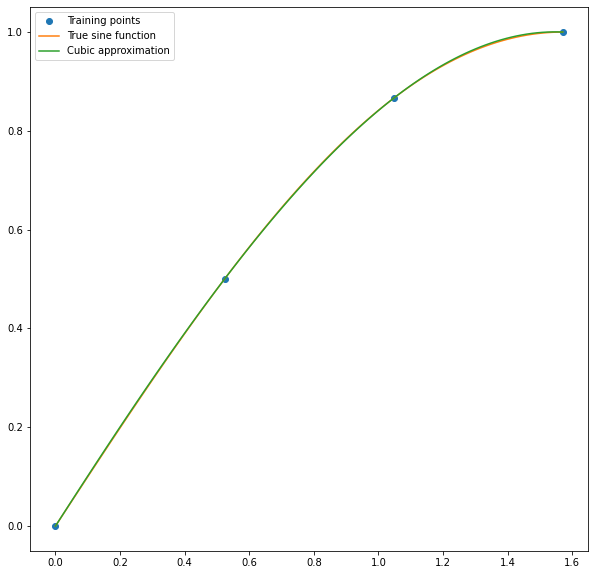

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(x, rhs, 'o', label='Training points')
plt.plot(xf, true, label='True sine function')
plt.plot(xf, cubic, label='Cubic approximation')
plt.legend()
plt.show()

The cubic function is an excellent approximation of the sine function on the interval $[0, \pi/2]$.